In [1]:
from keras.models import Sequential
from keras.layers.core import Activation,Flatten,Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from sklearn.model_selection import train_test_split
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



%matplotlib inline

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv("data/mnist/train.csv")
test_df = pd.read_csv("data/mnist/test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print train_df.shape
print test_df.shape

(42000, 785)
(28000, 784)


In [5]:
features = train_df.iloc[:,1:].values.reshape(len(train_df),28,28,1)
labels = train_df.iloc[:,0].values

In [6]:
print features.shape
print labels.shape

(42000, 28, 28, 1)
(42000,)


In [7]:
labels = keras.utils.to_categorical(labels,num_classes=10)

In [8]:
x_train , x_test, y_train , y_test = train_test_split(features,labels,test_size=0.20,random_state=1)

print x_train.shape

print x_test.shape

(33600, 28, 28, 1)
(8400, 28, 28, 1)


# creating model

In [9]:
def LeNet(length,width,output,channels):
    model = Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),input_shape=(length,width,channels)))
    
    #activation
    model.add(Activation('relu'))
    #pooling
    model.add(MaxPool2D(pool_size=(2,2)))
    
    #convolution
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Flatten())
    
    model.add(Dense(100))
    model.add(Activation('relu'))
    model.add(Dense(output))
    model.add(Activation('softmax'))
    
    return model
    
    


In [10]:
model = LeNet(28,28,10,1)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
activation_2 (Activation)    (None, 2, 2, 64)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [12]:
model.compile(loss="categorical_crossentropy",optimizer="adadelta",metrics=['accuracy'])

In [13]:
EPOCHS= 70

In [14]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=EPOCHS)

Train on 33600 samples, validate on 8400 samples
Epoch 1/70
33600/33600 [==============================] - 10s 285us/step - loss: 0.8722 - acc: 0.8394 - val_loss: 0.2072 - val_acc: 0.9392
Epoch 2/70
33600/33600 [==============================] - 10s 289us/step - loss: 0.1936 - acc: 0.9426 - val_loss: 0.2011 - val_acc: 0.9460
Epoch 3/70
33600/33600 [==============================] - 9s 276us/step - loss: 0.1382 - acc: 0.9576 - val_loss: 0.1437 - val_acc: 0.9580
Epoch 4/70
33600/33600 [==============================] - 9s 276us/step - loss: 0.1085 - acc: 0.9674 - val_loss: 0.1481 - val_acc: 0.9574
Epoch 5/70
33600/33600 [==============================] - 9s 279us/step - loss: 0.0900 - acc: 0.9718 - val_loss: 0.1276 - val_acc: 0.9640
Epoch 6/70
33600/33600 [==============================] - 9s 280us/step - loss: 0.0713 - acc: 0.9776 - val_loss: 0.1704 - val_acc: 0.9558
Epoch 7/70
33600/33600 [==============================] - 9s 280us/step - loss: 0.0642 - acc: 0.9801 - val_loss: 0.1550 -

33600/33600 [==============================] - 9s 262us/step - loss: 0.0035 - acc: 0.9991 - val_loss: 0.3190 - val_acc: 0.9695
Epoch 60/70
33600/33600 [==============================] - 9s 276us/step - loss: 0.0051 - acc: 0.9989 - val_loss: 0.3123 - val_acc: 0.9705
Epoch 61/70
33600/33600 [==============================] - 8s 251us/step - loss: 0.0064 - acc: 0.9987 - val_loss: 0.3228 - val_acc: 0.9690
Epoch 62/70
33600/33600 [==============================] - 8s 252us/step - loss: 0.0053 - acc: 0.9988 - val_loss: 0.3171 - val_acc: 0.9711
Epoch 63/70
33600/33600 [==============================] - 9s 255us/step - loss: 0.0057 - acc: 0.9985 - val_loss: 0.3206 - val_acc: 0.9712
Epoch 64/70
33600/33600 [==============================] - 8s 251us/step - loss: 0.0065 - acc: 0.9984 - val_loss: 0.3246 - val_acc: 0.9667
Epoch 65/70
33600/33600 [==============================] - 8s 249us/step - loss: 0.0043 - acc: 0.9991 - val_loss: 0.3200 - val_acc: 0.9699
Epoch 66/70
33600/33600 [==============

In [15]:
model.save_weights('mnist.h5')

In [16]:
model.load_weights('mnist.h5')

# Testing our Data

In [17]:
test_df.shape

(28000, 784)

In [18]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_set = test_df.iloc[:,:].values.reshape(len(test_df),28,28,1)

In [20]:
test_set.shape

(28000, 28, 28, 1)

In [21]:
prediction = model.predict(test_set)

print prediction

[[  0.00000000e+00   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   2.31247677e-35 ...,   4.69094918e-38
    0.00000000e+00   1.32279411e-24]
 [  0.00000000e+00   0.00000000e+00   2.10438675e-34 ...,   3.67780848e-33
    8.20754776e-20   1.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.12625666e-32
    0.00000000e+00   1.00000000e+00]
 [  3.03293901e-36   0.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    5.26811958e-32   0.00000000e+00]]


In [22]:
prediction = np.argmax(prediction,axis=1)


In [23]:
print prediction[0]

2


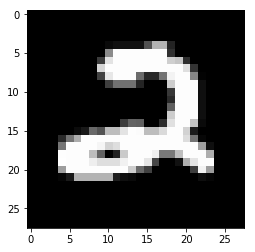

In [24]:
test_set_one = test_set[0].reshape(28,28)


plt.imshow(test_set_one,cmap="gray")

In [25]:
# create series 1 to 28,000
imageid = pd.Series(range(1,len(test_set)+1))
# create dataframe to hold id and predicted label
df_output = pd.DataFrame({"ImageId":imageid,"Label":prediction})

df_output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


In [26]:
df_output.to_csv('output.csv',index=False)